## california data (linear regression data)

In [143]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)
california.data

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1)

## Logistic regrssion 용 데이터

In [118]:
#  해당 코드는 수정하지 마세요
from sklearn.datasets import make_classification


X, y = make_classification(n_features=8, n_informative=5,
                           n_redundant=3, n_clusters_per_class=1, random_state=4, n_samples =1000 )

In [119]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state = 4) # 90 : 10 으로 데이터 분할
y.shape

(1000,)

In [123]:
import numpy as np
data = np.transpose(X)        #corrcoef를 만들기 위해서는 feature가 x로 와야함 (8,~) 로 만들어줌
ca = np.corrcoef(data)    #넘파이의 corrcoef함수 사용해서 correlation coefficient array 만들어준다
maxval = []         #좀 더 자세한 과정을 보여주기 위해서 corrcoef가 높은값들을 따로 저장하기 위한 배열

for n in range(0,8):
    arr = np.sort(ca[n])     # 오름차순 정렬
    maxval.append(arr[6])   # 1.0 값 제외하여야 하니까 6번째 
maxval.sort()
maxval.reverse()     #큰 순서대로 나타내기 위함
for n in range(0,8):
    print(np.where(ca == maxval[n]))   #어디 인덱스에 있는지 찾기위함
    
farr = np.vstack([data[0],data[2],data[3],data[4],data[7]])   #인덱스 찾아서 하나의 배열로 만들어주기 위함
ca2 = np.corrcoef(farr)    # 마지막 정리
ca2.shape

(array([2, 7], dtype=int32), array([7, 2], dtype=int32))
(array([2, 7], dtype=int32), array([7, 2], dtype=int32))
(array([0, 4], dtype=int32), array([4, 0], dtype=int32))
(array([0, 4], dtype=int32), array([4, 0], dtype=int32))
(array([0, 3], dtype=int32), array([3, 0], dtype=int32))
(array([6], dtype=int32), array([7], dtype=int32))
(array([5, 6], dtype=int32), array([6, 5], dtype=int32))
(array([1], dtype=int32), array([3], dtype=int32))


(5, 5)

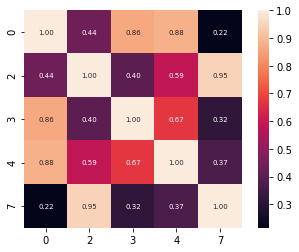

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

label = []
ran = [0,2,3,4,7]
for a in range(0,len(ran)):
    label.append(ran[a])
heatmap2 = sns.heatmap(ca2,cbar = True,annot = True,square = True,fmt = '.2f',annot_kws = {'size':7},
                      yticklabels = label,xticklabels = label)
plt.show()

In [122]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import r2_score

logleg = LogisticRegression()   #logistic regression 모델 생성
logleg.fit(x_train,y_train)    # train data 전체로 학습 진행
pred = logleg.predict(x_test)   # test data로 predict
score1 = (pred == y_test).mean() # test acc 
# rs1 = r2_score(y_test,pred)  


logleg2 = LogisticRegression()

X_train = np.vstack([x_train[:,0],x_train[:,2],x_train[:,3],x_train[:,4],x_train[:,7]])   #위에서 corrcoef가 높은 5개 feature모아서 데이터 셋 만들기
X_train = np.transpose(X_train) #vstack으로 쌓은것은 y_train과 모양이 맞지 않음 (reshape 하나하나 하는 대신에 하는 과정임)
logleg2.fit(X_train,y_train)   # 모델 학습

X_test = np.vstack([x_test[:,0],x_test[:,2],x_test[:,3],x_test[:,4],x_test[:,7]])  #test set도 마찬가지로 쌓아줌
X_test = np.transpose(X_test)
pred2 = logleg2.predict(X_test)
score2 = (pred2 == y_test).mean()
# rs2 = r2_score(y_test,pred2)
print("test acc 전체 feature = ",score1,", test acc 5개 feature = ",score2)


test acc 전체 feature =  0.97 , test acc 5개 feature =  0.94


In [131]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(california.data)
california.data = std_scaler.transform(california.data)   #normalize ,데이터 정규화 작업
california.data

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [132]:
x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.1,random_state = 4)

In [133]:
def adjust_r2(n,p,r2):   #adjusted R2 함수 만들어서 사용
    value = (n - 1)*(1 - r2)/(n-p-1)
    return 1 - value

max_adjust_val = []   #adjusted r2 score 중 max value를 저장할 배열
max_adjust_val_train = [] # adjusted r2 score (train data)중 max value를 저장할 배열
adjust_val = []    # adjusted r2 score 전체 저장할 배열
adjust_val_train = []   #adjusted r2 score (train data) 전체 저장할 배열

for a in range(0,8):                  #총 feature가 8개 이므로 forward selection 진행
    linleg = LinearRegression()
    first_x_train = x_train[:,a].reshape(-1,1)        #보고서 추가 설명
    
    first_x_test = x_test[:,a].reshape(-1,1) #forward selection은 feature를 1개 -> 2개 -> 늘려가면서 성능을 좋은것으로 greedy 하게 선택
    linleg.fit(first_x_train,y_train)  # 선택한 데이터로 학습
    pred = linleg.predict(first_x_test)   # 정확도를 뽑기 위한 예측 실시
    r2 = r2_score(y_test,pred)            #r2 score 측정
    pred2 = linleg.predict(first_x_train)   # train acc
    r2_train = r2_score(y_train,pred2)  #r2 score 측정 (train)
    adjust_val.append(adjust_r2(2064,8,r2))    # adjusted r2 score 측정
    adjust_val_train.append(adjust_r2(18576,8,r2_train)) # adjusted r2 score (train) 측정
    
print(adjust_val.index(max(adjust_val))) # 몇 번째 feature가 제일 성능이 좋은지를 위한 index 출력
max_adjust_val.append(max(adjust_val))    #나중에 시각화를 위한 자료 기록
max_adjust_val_train.append(max(adjust_val_train))

0


In [134]:
adjust_val2 = []
adjust_val2_train = []
for b in range(0,8):     #forward selection 진행 계속 (2 번째 feature 고르기)
    linleg = LinearRegression()
    
    second_x_train = np.hstack([x_train[:,0].reshape(-1,1),x_train[:,b].reshape(-1,1)])  #0번 feature가 첫 단계에서 선택이 됐음
    second_x_test = np.hstack([x_test[:,0].reshape(-1,1),x_test[:,b].reshape(-1,1)])
    linleg.fit(second_x_train,y_train)   #첫 번째 단계와 동일
    pred = linleg.predict(second_x_test)
    pred2 = linleg.predict(second_x_train)
    r2 = r2_score(y_test,pred)
    r2_train = r2_score(y_train,pred2)
    adjust_val2.append(adjust_r2(2064,8,r2))
    adjust_val2_train.append(adjust_r2(18576,8,r2_train))

print(adjust_val2.index(max(adjust_val2)))
    
max_adjust_val.append(max(adjust_val2))
    
max_adjust_val_train.append(max(adjust_val2_train))
    

1


In [135]:
adjust_val3 = []
adjust_val3_train = []
for c in range(0,8):    #forward selection 진행 계속 (3 번째 feature 고르기)
    linleg = LinearRegression()
    
    third_x_train = np.hstack([x_train[:,0].reshape(-1,1),x_train[:,1].reshape(-1,1),x_train[:,c].reshape(-1,1)]) #0번과 1번이 선택 됐음
    third_x_test = np.hstack([x_test[:,0].reshape(-1,1),x_test[:,1].reshape(-1,1),x_test[:,c].reshape(-1,1)])
    linleg.fit(third_x_train,y_train)
    pred = linleg.predict(third_x_test)
    pred2 = linleg.predict(third_x_train)
    r2 = r2_score(y_test,pred)
    r2_train = r2_score(y_train,pred2)
    adjust_val3.append(adjust_r2(2064,8,r2))
    adjust_val3_train.append(adjust_r2(18576,8,r2_train))

    
print(adjust_val3.index(max(adjust_val3)))

max_adjust_val.append(max(adjust_val3))

max_adjust_val_train.append(max(adjust_val3_train))

6


In [136]:
adjust_val4 = []
adjust_val4_train = []
for d in range(0,8):    #forward selection 4 번째 단계 진행
    linleg = LinearRegression()
    fourth_x_train = np.hstack([x_train[:,0].reshape(-1,1),x_train[:,1].reshape(-1,1),x_train[:,6].reshape(-1,1),x_train[:,d].reshape(-1,1)])
    fourth_x_test = np.hstack([x_test[:,0].reshape(-1,1),x_test[:,1].reshape(-1,1),x_test[:,6].reshape(-1,1),x_test[:,d].reshape(-1,1)])
    linleg.fit(fourth_x_train,y_train)
    pred = linleg.predict(fourth_x_test) 
    pred2 = linleg.predict(fourth_x_train)
    r2 = r2_score(y_test,pred)
    r2_train = r2_score(y_train,pred2)
    adjust_val4.append(adjust_r2(2064,8,r2))
    adjust_val4_train.append(adjust_r2(18576,8,r2))
print(adjust_val4.index(max(adjust_val4)))

max_adjust_val.append(max(adjust_val4))
max_adjust_val_train.append(max(adjust_val4_train))

7


In [137]:
adjust = []
adjust.append(adjust_val)
adjust.append(adjust_val2)
adjust.append(adjust_val3)
adjust.append(adjust_val4)
adjust_train = []
adjust_train.append(adjust_val_train)
adjust_train.append(adjust_val2_train)
adjust_train.append(adjust_val3_train)
adjust_train.append(adjust_val4_train)

[0.46771027043454205, 0.48990779651965644, 0.5009346044334102, 0.576302977063271]
[0.4735210353462378, 0.5106084718161783, 0.5183826907850217, 0.5777641583918905]


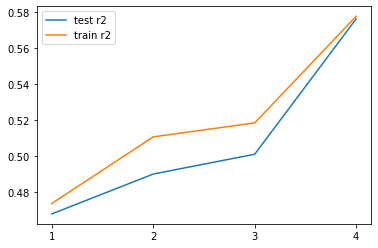

In [144]:
import matplotlib.pyplot as plt
#시각화 진행 x축은 variable 개수 y축은 정확도로 나타냄

plt.plot(range(1,5),max_adjust_val,label = 'test r2')  #test r2를 나타냄
plt.plot(range(1,5),max_adjust_val_train,label = 'train r2')  #train r2 나타냄
plt.legend(loc = 'best')
plt.xticks(np.arange(1,5,step = 1)) 

print(max_adjust_val)
print(max_adjust_val_train)

In [64]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = [    #Lasso 모델에서 하이퍼 파라미터 비교를 위한 파라미터들
    {'alpha': [0.0001,0.001,0.01,1,5,10,20],
    'max_iter': [10000,30000,50000,80000,100000],
    'normalize':[True,False]}
]
gs = GridSearchCV(Lasso(random_state = 95),param_grid = param_grid,cv=5)   #그리드 서치를 통해서 best parameter를 뽑아내도록 한다
gs.fit(x_train,y_train)
print(gs.best_params_)
print(gs.best_score_)
lasso = Lasso(alpha = 0.001,max_iter = 10000)
lasso.fit(x_train,y_train)


{'alpha': 0.001, 'max_iter': 10000, 'normalize': False}
0.6022008789660833


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
pred_lasso = lasso.predict(x_test)
r2_lasso = r2_score(y_test,pred_lasso)
r2_lasso

0.5934161351748893